In [1]:
# imports.py
from imports import *

# plotting magic
%matplotlib inline

# custom mods
import tidy
import model_h

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
df=tidy.explore_df()
df.info()

cached csv
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2807 entries, 2014-09-17 00:00:00+00:00 to 2022-05-24 00:00:00+00:00
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   open                2807 non-null   float64
 1   high                2807 non-null   float64
 2   low                 2807 non-null   float64
 3   close               2807 non-null   float64
 4   volume              2807 non-null   int64  
 5   fwd_log_ret         2807 non-null   float64
 6   fwd_ret             2807 non-null   float64
 7   fwd_pct_chg         2807 non-null   float64
 8   fwd_close_positive  2807 non-null   bool   
dtypes: bool(1), float64(7), int64(1)
memory usage: 200.1 KB


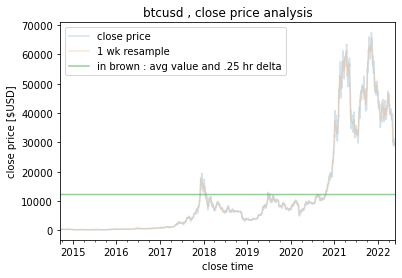

In [3]:
model_h.print_btcusd(df)

In [4]:
df.head()

,open,high,low,close,volume,fwd_log_ret,fwd_ret,fwd_pct_chg,fwd_close_positive
date,,,,,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,-0.074643,-32.894013,-0.071926,False
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,-0.072402,-29.644012,-0.069843,False
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,0.035111,14.108002,0.035735,True
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,-0.024968,-10.082978,-0.024659,False
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,0.008317,3.330994,0.008352,True


<AxesSubplot:xlabel='date'>

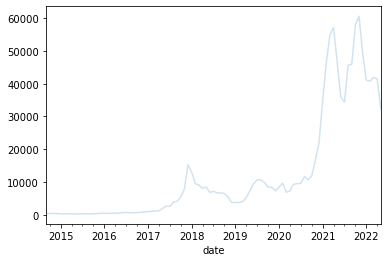

In [5]:
df.close.resample('m').mean().plot(alpha=.2, label='resample')

In [6]:
# model_h.d_stats_btcusd(df)

In [7]:
def split_i(df):
	train = df.loc[:'2022-3-22']
	validate =df.loc['2022-03-23':'2022-04-23'] 
	return train, validate

In [8]:
def split_ii(df):
	train = df.loc[:'2022-04-24']
	test = df.loc['2022-04-25':]
	return train, test

In [9]:
train_i, validate=split_i(df)
train_i.info(),validate.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2744 entries, 2014-09-17 00:00:00+00:00 to 2022-03-22 00:00:00+00:00
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   open                2744 non-null   float64
 1   high                2744 non-null   float64
 2   low                 2744 non-null   float64
 3   close               2744 non-null   float64
 4   volume              2744 non-null   int64  
 5   fwd_log_ret         2744 non-null   float64
 6   fwd_ret             2744 non-null   float64
 7   fwd_pct_chg         2744 non-null   float64
 8   fwd_close_positive  2744 non-null   bool   
dtypes: bool(1), float64(7), int64(1)
memory usage: 195.6 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 32 entries, 2022-03-23 00:00:00+00:00 to 2022-04-23 00:00:00+00:00
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  ----

(None, None)

In [10]:
train_ii, test=split_ii(df)
train_ii.info(),test.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2777 entries, 2014-09-17 00:00:00+00:00 to 2022-04-24 00:00:00+00:00
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   open                2777 non-null   float64
 1   high                2777 non-null   float64
 2   low                 2777 non-null   float64
 3   close               2777 non-null   float64
 4   volume              2777 non-null   int64  
 5   fwd_log_ret         2777 non-null   float64
 6   fwd_ret             2777 non-null   float64
 7   fwd_pct_chg         2777 non-null   float64
 8   fwd_close_positive  2777 non-null   bool   
dtypes: bool(1), float64(7), int64(1)
memory usage: 198.0 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 30 entries, 2022-04-25 00:00:00+00:00 to 2022-05-24 00:00:00+00:00
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  ----

(None, None)

In [11]:
df.fwd_log_ret.sum()

4.17316149094532

In [12]:
df.close[-1]-df.close[0]

# this is ROI if you bought 1 btc in 2014-09-17 and sold in 2022-05-24

29198.251923

In [13]:
df.index[0].date()

datetime.date(2014, 9, 17)

In [14]:
macd, signal, histo = talib.MACD(df.close,fastperiod=12, slowperiod=26, signalperiod=9)

In [15]:
mac=pd.concat([df,macd,signal,histo],axis=1)


In [16]:
mac=mac.rename(columns={0:'macd',1:'signal',2:'histo'})

In [17]:
mac=mac.drop(mac[mac.index<'2014-10-20'].index)

In [18]:
mac=mac.fillna(0)

In [19]:
mac.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2774 entries, 2014-10-20 00:00:00+00:00 to 2022-05-24 00:00:00+00:00
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   open                2774 non-null   float64
 1   high                2774 non-null   float64
 2   low                 2774 non-null   float64
 3   close               2774 non-null   float64
 4   volume              2774 non-null   int64  
 5   fwd_log_ret         2774 non-null   float64
 6   fwd_ret             2774 non-null   float64
 7   fwd_pct_chg         2774 non-null   float64
 8   fwd_close_positive  2774 non-null   bool   
 9   macd                2774 non-null   float64
 10  signal              2774 non-null   float64
 11  histo               2774 non-null   float64
dtypes: bool(1), float64(10), int64(1)
memory usage: 262.8 KB


In [20]:
cools=mac.histo>0
start=cools[0]
not_list=[]

for x in cools:
	if x:
		not_list.append(1)
	else:
		not_list.append(0)

not_list=pd.Series(not_list, index=mac.index)

In [21]:
bools=mac.macd>mac.signal
yesterday=bools[0]
list=[]

for today in bools:
	if today==yesterday:
		list.append(0)
		continue
	else:
		list.append(1)
		yesterday=today

list=pd.Series(list, index=mac.index)

# crossover indicator

In [22]:
macker=pd.concat([mac.close,list,not_list],axis=1)
macker=macker.rename({0:'cross',1:'histy'},axis=1)



In [23]:
def macd_roi(df):
	buy=[]
	sell=[]
	for i in df.index:
		if df.loc[i].cross > 0:
			if df.loc[i].histy > 0:
				buy.append(df.loc[i].close)
				sell.append(0)
			else:
				buy.append(0)
				sell.append(df.loc[i].close)
		else:
			continue
	return buy,sell


buy,sell=macd_roi(macker)

In [24]:
profits=pd.DataFrame({'buy':buy,'sell':sell})

In [25]:
if profits.buy.loc[0] == 0:
	profits=profits.drop(0)
	profits.sell=profits.sell.shift(-1)
else:
	profits.sell=profits.sell.shift(-1)

In [26]:
(profits.sell-profits.buy).sum()

36491.43405399999

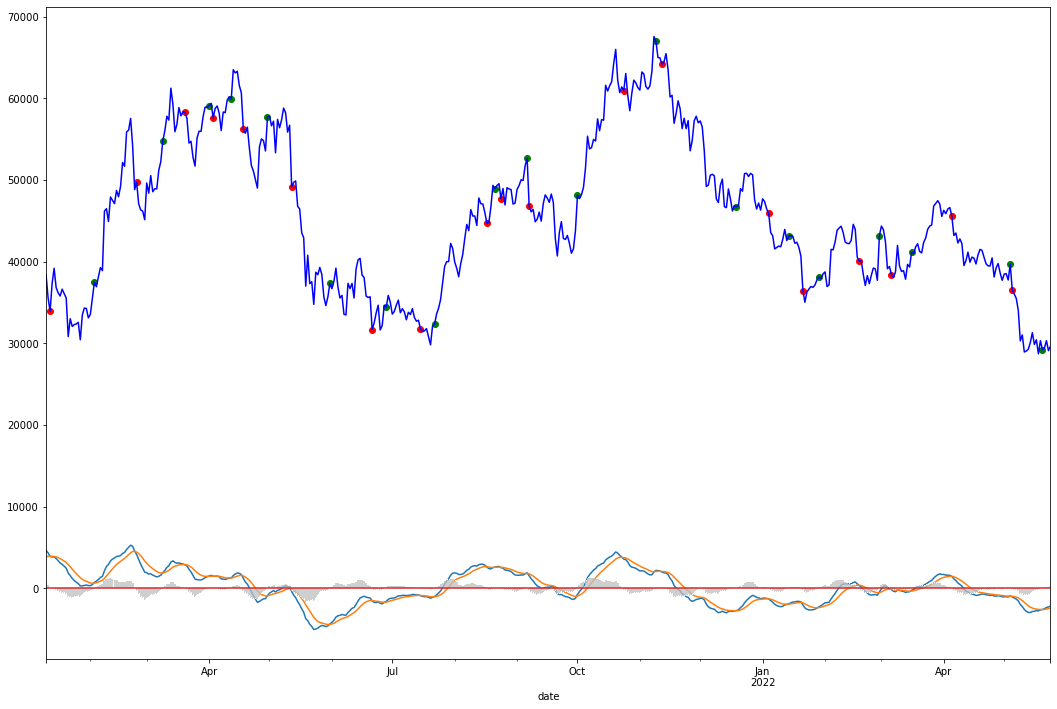

In [27]:
plt.figure(figsize=[18,12])
mac.macd.tail(500).plot()
mac.signal.tail(500).plot()
plt.stem(mac.index[-500:],mac['histo'].tail(500),linefmt='silver',markerfmt='w,')
_=macker[(macker.cross==1)&(macker.histy==1)].tail(500)
plt.scatter(y=_.close,x=_.index,c='green')
_=macker[(macker.cross==1)&(macker.histy==0)].tail(500)
plt.scatter(y=_.close,x=_.index,c='red')
macker.close.tail(500).plot(color='blue')
plt.show()


#wip


In [28]:
macker.head()

,close,cross,histy
date,,,
2014-10-20 00:00:00+00:00,382.845001,0,1
2014-10-21 00:00:00+00:00,386.475006,0,1
2014-10-22 00:00:00+00:00,383.157990,0,1
2014-10-23 00:00:00+00:00,358.416992,0,1
2014-10-24 00:00:00+00:00,358.345001,0,1
